In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
from matplotlib.pyplot import figure

In [2]:
# Load the dataframe
df = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv', delimiter=',')
#df.head(1)

## Describe the Data

In [3]:
# Set a color matrix to be used later
colors = ['brown', 'orange', 'olive', 'green', 'blue', 'cyan', 'purple', 'pink', 'gray', 'salmon', 'violet', 'crimson']
original_len = len(df)
print('The original dataset is made of %d entries.' %(original_len))

The original dataset is made of 399918 entries.


Inspection Dates Start from January 1, 2010. The restaurants that have not been inspected yet are given the date January 1,1900. Those will be removed from the datasets

In [4]:
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])
df = df[df['INSPECTION DATE'] > '2009-12-31']
print('%d points had invalid dates.' %(original_len-len(df)))

1135 points had invalid dates.


In [116]:
print('The data set has %d different types of violation codes' %(len(df['VIOLATION CODE'].unique())))

The data set has 98 different types of violation codes


The 98 violations codes have been grouped into macro-catgories of similar nature and have all been given a name. The dictionary in the cell below shows which labels have been given to each code.

In [119]:
viol_dict = {'02A': 'Food Temperature',
 '02B': 'Food Temperature',
 '02C': 'Food Temperature',
 '02D': 'Food Temperature',
 '02E': 'Food Temperature',
 '02F': 'Allergies/Safety',
 '02G': 'Food Temperature',
 '02H': 'Food Temperature',
 '02I': 'Food Temperature',
 '02J': 'Food Temperature',
 '03A': 'Certification',
 '03B': 'Certification',
 '03C': 'Food Contamination',
 '03D': 'Food Contamination',
 '03E': 'Certification',
 '03F': 'Allergies/Safety',
 '03G': 'Food Contamination',
 '04A': 'Certification',
 '04B': 'Worker Cleanliness',
 '04C': 'Worker Cleanliness',
 '04D': 'Worker Cleanliness',
 '04E': 'Hazardous Chemicals',
 '04F': 'Facility Cleanliness',
 '04G': 'Hazardous Chemicals',
 '04H': 'Food Contamination',
 '04I': 'Food Contamination',
 '04J': 'Allergies/Safety',
 '04K': 'Animals',
 '04L': 'Animals',
 '04M': 'Animals',
 '04N': 'Animals',
 '04O': 'Animals',
 '05A': 'Facility Cleanliness',
 '05B': 'Hazardous Chemicals',
 '05C': 'Facility Amenities',
 '05D': 'Facility Amenities',
 '05E': 'Facility Amenities',
 '05F': 'Facility Amenities',
 '05H': 'Facility Amenities',
 '05I': 'Allergies/Safety',
 '06A': 'Worker Cleanliness',
 '06B': 'Tobacco',
 '06C': 'Food Contamination',
 '06D': 'Food Contamination',
 '06E': 'Facility Cleanliness',
 '06F': 'Facility Cleanliness',
 '06G': 'Documentation',
 '06H': 'Documentation',
 '06I': 'Documentation',
 '07A': 'Other',
 '08A': 'Facility Cleanliness',
 '08B': 'Facility Cleanliness',
 '08C': 'Hazardous Chemicals',
 '09A': 'Food Contamination',
 '09B': 'Other',
 '09C': 'Facility Cleanliness',
 '10A': 'Facility Amenities',
 '10B': 'Facility Amenities',
 '10C': 'Facility Amenities',
 '10D': 'Facility Amenities',
 '10E': 'Facility Amenities',
 '10F': 'Facility Amenities',
 '10G': 'Facility Amenities',
 '10H': 'Facility Cleanliness',
 '10I': 'Facility Cleanliness',
 '10J': 'Other',
 '15E': 'Facility Cleanliness',
 '15H': 'Tobacco',
 '15I': 'Tobacco',
 '15J': 'Tobacco',
 '15K': 'Tobacco',
 '15L': 'Tobacco',
 '15S': 'Tobacco',
 '15T': 'Tobacco',
 '16A': 'Other',
 '16B': 'Documentation',
 '16C': 'Documentation',
 '16D': 'Documentation',
 '16E': 'Documentation',
 '16F': 'Documentation',
 '18B': 'Documentation',
 '18C': 'Certification',
 '18D': 'Certification',
 '18F': 'Certification',
 '20A': 'Allergies/Safety',
 '20B': 'Allergies/Safety',
 '20D': 'Allergies/Safety',
 '20E': 'Documentation',
 '20F': 'Documentation',
 '22A': 'Facility Amenities',
 '22B': 'Facility Amenities',
 '22C': 'Facility Amenities',
 '22E': 'Certification'}

In [117]:
file_in = 'Violations_explanation.csv'
viol_dict = {}
with open(file_in, 'r') as f_in:
    f_in.readline() # Skip the header
    for line in f_in.readlines():
        line = line.strip('\n')
        line = line.split(';')
        viol_dict[line[0]] = line[-1]
df['VIOLATION TYPE'] = df['VIOLATION CODE'].map(viol_dict)

In [120]:
df['VIOLATION TYPE'] = df['VIOLATION CODE'].map(viol_dict)

Pick the most common cuisines. Set the threshold to the percentage one wants.

In [6]:
cuisine_counts = {}
major_cuisines = []
threshold = 0.03 # Threshold to discriminate the presence of restaurants.

for i in df['CUISINE DESCRIPTION'].unique():
    cuisine_counts[i] = float(len(df[df['CUISINE DESCRIPTION']==i]))

major_cuisines = [i for i in cuisine_counts.keys() if cuisine_counts[i]/sum(cuisine_counts.values()) > threshold]

In [7]:
df = df[df['CUISINE DESCRIPTION'].isin(major_cuisines)]
print('The dataframe now is made of %d points' %(len(df)))

The dataframe now is made of 247178 points


Group the violations into categories

In [8]:
file_in = 'Violations_explanation.csv'
viol_dict = {}
with open(file_in, 'r') as f_in:
    f_in.readline() # Skip the header
    for line in f_in.readlines():
        line = line.strip('\n')
        line = line.split(';')
        viol_dict[line[0]] = line[-1]
df['VIOLATION TYPE'] = df['VIOLATION CODE'].map(viol_dict)

## Look at criticality of violations

There are 136550 critical flags and 107060 non critical flags.


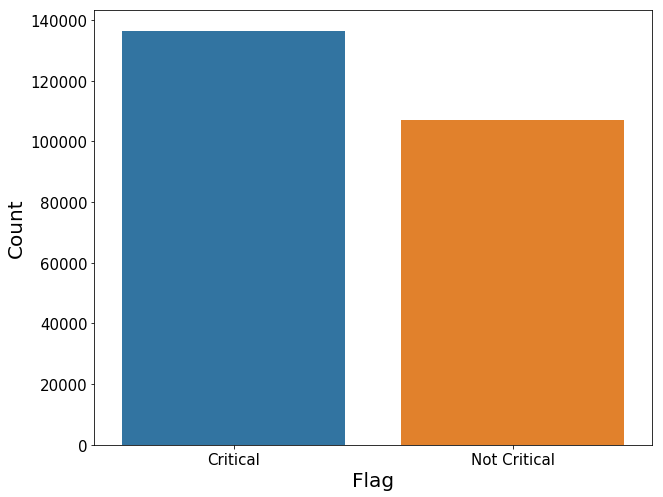

In [9]:
flags=df[df['CRITICAL FLAG'].isin(['Critical', 'Not Critical'])]
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(data=flags, x='CRITICAL FLAG')
ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('Flag', fontsize=20)
ax.tick_params(labelsize=15)
print('There are %d critical flags and %d non critical flags.' %(sum(flags['CRITICAL FLAG']=='Critical'), sum(flags['CRITICAL FLAG']=='Not Critical')))

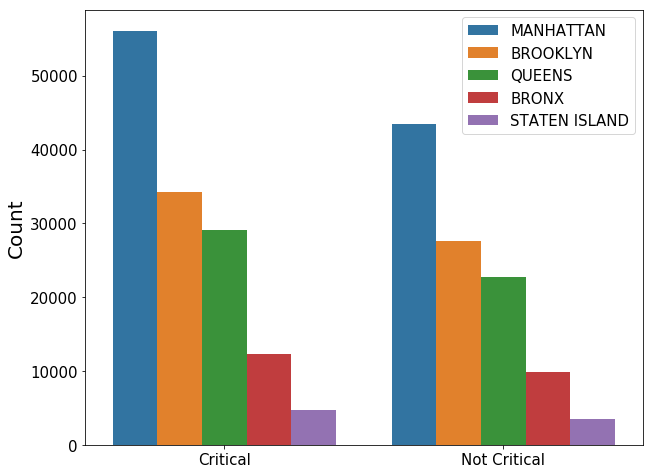

In [10]:
#flags.head()
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(data=flags, x='CRITICAL FLAG', hue='BORO', hue_order=flags['BORO'].value_counts().index)
ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('')
ax.tick_params(labelsize=15)
ax = plt.legend(fontsize=15)

MANHATTAN has 56104 Critical Violations and 43417 Non Critical Violations.
QUEENS has 29150 Critical Violations and 22754 Non Critical Violations.
STATEN ISLAND has 4727 Critical Violations and 3444 Non Critical Violations.
BROOKLYN has 34245 Critical Violations and 27647 Non Critical Violations.
BRONX has 12324 Critical Violations and 9798 Non Critical Violations.


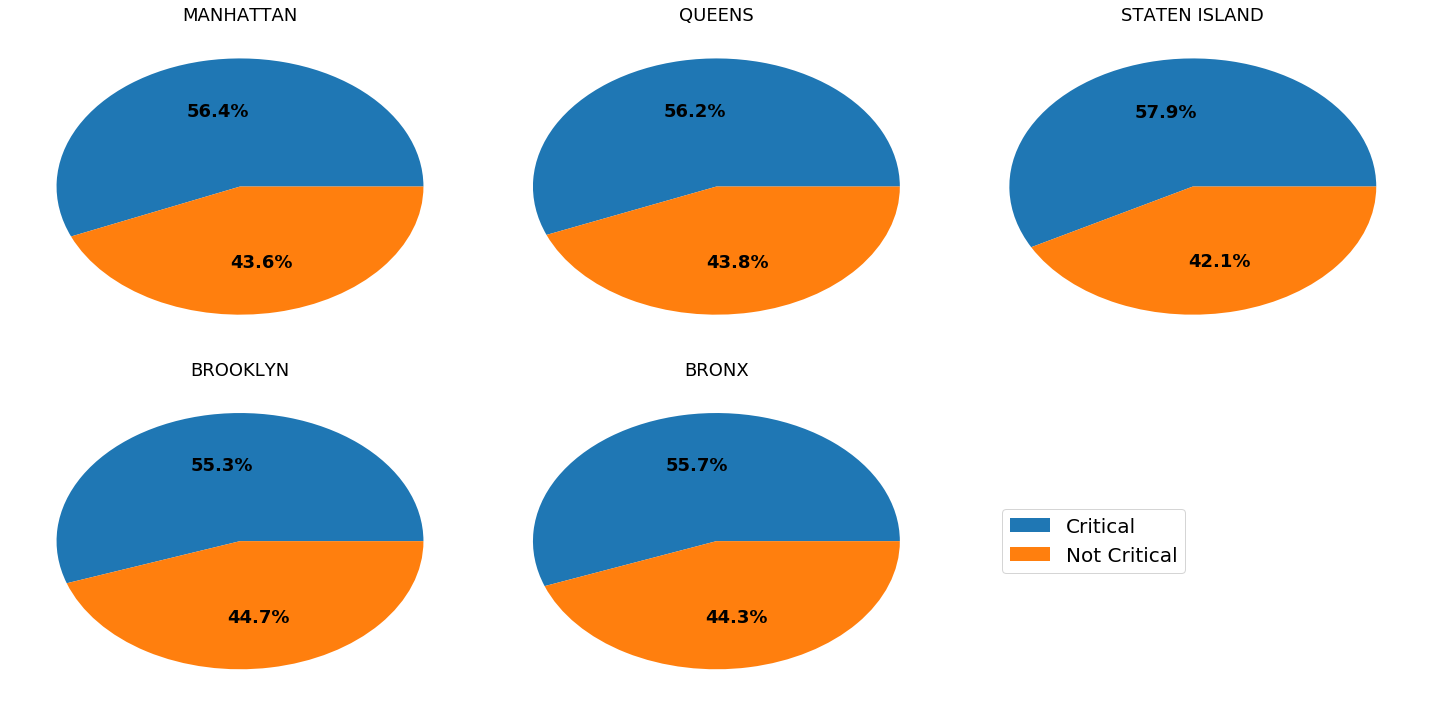

In [11]:
labels = ['Critical', 'Not Critical']
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

fig = plt.figure(figsize=(20,10))
graph = 1

for i in flags['BORO'].unique():
    criticalities = []
    flags_bor = flags[flags['BORO'] == i]
    criticalities = [len(flags_bor[flags_bor['CRITICAL FLAG']==l]) for l in flags['CRITICAL FLAG'].unique()]
    print('%s has %d Critical Violations and %d Non Critical Violations.' %(i, criticalities[0], criticalities[1]))
    ax = fig.add_subplot(2,3,graph)
    ax, text, autotext = plt.pie(x=criticalities, autopct=lambda pct: func(pct, criticalities))
    plt.title(i, fontsize=18)
    plt.setp(autotext, size=18, weight='bold')
    graph += 1
    plt.tight_layout()
        
plt.legend(ax, labels, bbox_to_anchor=(1.1,0.5), loc="center left", fontsize=20)
plt.show()

Plotted the grades divided by boros

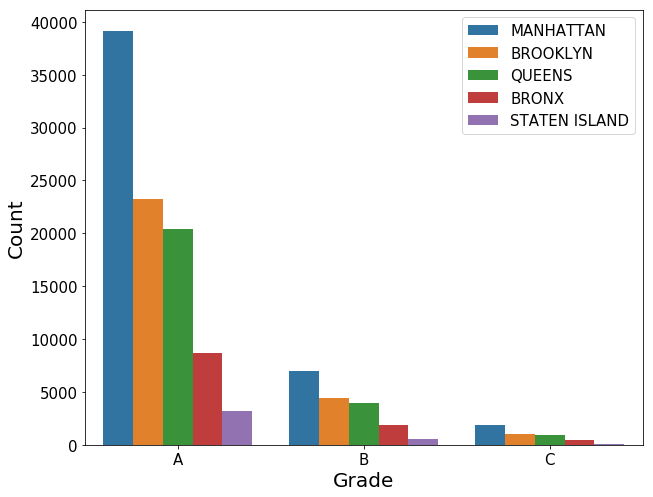

In [12]:
grades = df[df['GRADE'].isin(['A','B', 'C'])]
fig = plt.figure(figsize=(10,8))
#grades['GRADE'].value_counts()
ax = sns.countplot(x='GRADE', hue='BORO', data=grades, order=grades['GRADE'].value_counts().index, hue_order=grades['BORO'].value_counts().index)
ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('Grade', fontsize=20)
ax.tick_params(labelsize=15)
ax = plt.legend(fontsize=15)

Plotted the average scores by boro

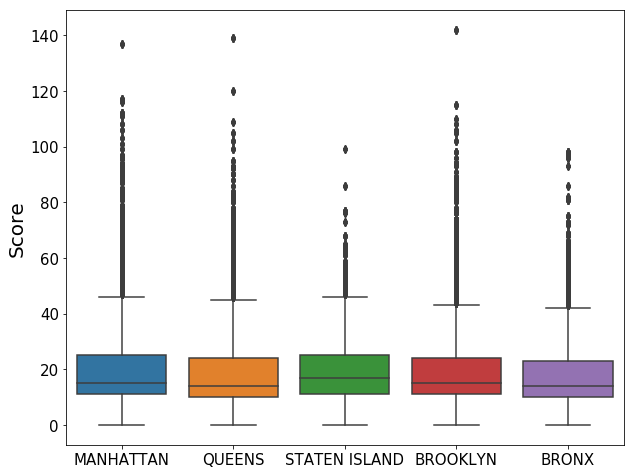

In [13]:
df['SCORE'].dropna()
df = df[df['SCORE'] >= 0]
boros = df[df['BORO'] != 'Missing']
boros = boros[boros['SCORE'] >= 0]
fig = plt.figure(figsize=(10,8))
ax = sns.boxplot(x='BORO', y='SCORE', data=boros)
ax.set_ylabel('Score', fontsize=20)
ax.set_xlabel('')
ax.tick_params(labelsize=15)

In [14]:
for elem in boros['BORO'].unique():
    print(elem, '\n',boros['SCORE'].loc[boros['BORO']==elem].describe())

MANHATTAN 
 count    95186.000000
mean        19.125470
std         12.886221
min          0.000000
25%         11.000000
50%         15.000000
75%         25.000000
max        137.000000
Name: SCORE, dtype: float64
QUEENS 
 count    49977.000000
mean        18.581247
std         12.725750
min          0.000000
25%         10.000000
50%         14.000000
75%         24.000000
max        139.000000
Name: SCORE, dtype: float64
STATEN ISLAND 
 count    7816.000000
mean       19.820113
std        12.783162
min         0.000000
25%        11.000000
50%        17.000000
75%        25.000000
max        99.000000
Name: SCORE, dtype: float64
BROOKLYN 
 count    59069.000000
mean        19.220048
std         13.233721
min          0.000000
25%         11.000000
50%         15.000000
75%         24.000000
max        142.000000
Name: SCORE, dtype: float64
BRONX 
 count    21289.000000
mean        18.291653
std         12.288485
min          0.000000
25%         10.000000
50%         14.000000
75% 

## Violations by season

It would be interesting to look at the seasons when inspections happened to see if there is a variation in the violations with the season. Add the month and season of the inspection.

In [15]:
season_dict = {}
# Extact the month from each inspection date
df['MONTH']=pd.DatetimeIndex(df['INSPECTION DATE']).month

for month in range(1,13):
    if month > 2 and month < 6:
        season_dict[month] = 'Spring'
    elif month > 2 and month < 9:
        season_dict[month] = 'Summer'
    elif month > 2 and month < 12:
        season_dict[month] = 'Fall'
    else:
        season_dict[month] = 'Winter'

df['SEASON'] = df['MONTH'].map(season_dict)

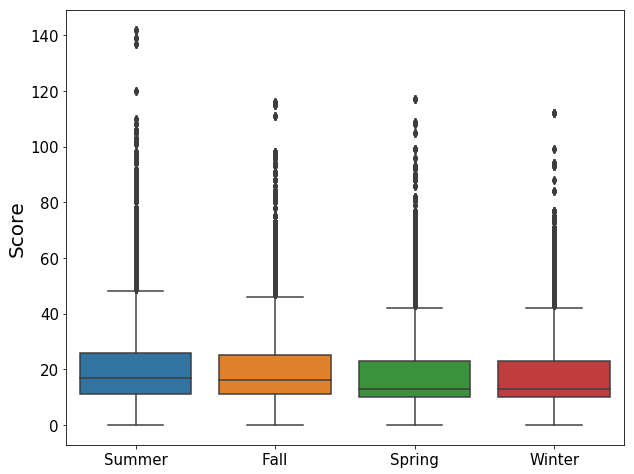

In [16]:
fig = plt.figure(figsize=(10,8))
ax = sns.boxplot(x='SEASON', y='SCORE', data=df)
ax.set_ylabel('Score', fontsize=20)
ax.set_xlabel('')
ax.tick_params(labelsize=15)

In [17]:
for elem in df['SEASON'].unique():
    print(elem, '\n',df['SCORE'].loc[df['SEASON']==elem].describe())

Summer 
 count    66465.000000
mean        20.831746
std         14.480956
min          0.000000
25%         11.000000
50%         17.000000
75%         26.000000
max        142.000000
Name: SCORE, dtype: float64
Fall 
 count    50143.000000
mean        19.309854
std         12.923086
min          0.000000
25%         11.000000
50%         16.000000
75%         25.000000
max        116.000000
Name: SCORE, dtype: float64
Spring 
 count    65207.000000
mean        17.977058
std         12.109469
min          0.000000
25%         10.000000
50%         13.000000
75%         23.000000
max        117.000000
Name: SCORE, dtype: float64
Winter 
 count    51522.000000
mean        17.539692
std         11.219728
min          0.000000
25%         10.000000
50%         13.000000
75%         23.000000
max        112.000000
Name: SCORE, dtype: float64


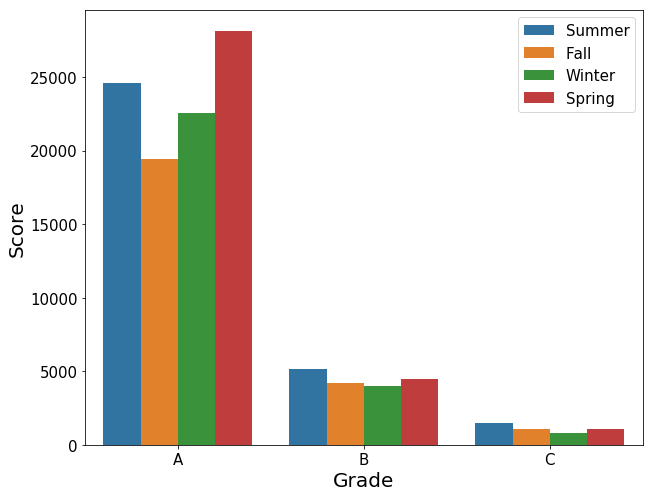

In [18]:
grades_by_seas = df[df['GRADE'].isin(['A','B', 'C'])]
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(x='GRADE', hue='SEASON', data=grades_by_seas, order=grades_by_seas['GRADE'].value_counts().index)
ax.set_ylabel('Score', fontsize=20)
ax.set_xlabel('Grade',fontsize=20)
ax.tick_params(labelsize=15)
ax = plt.legend(fontsize=15)

Most common violations by boro

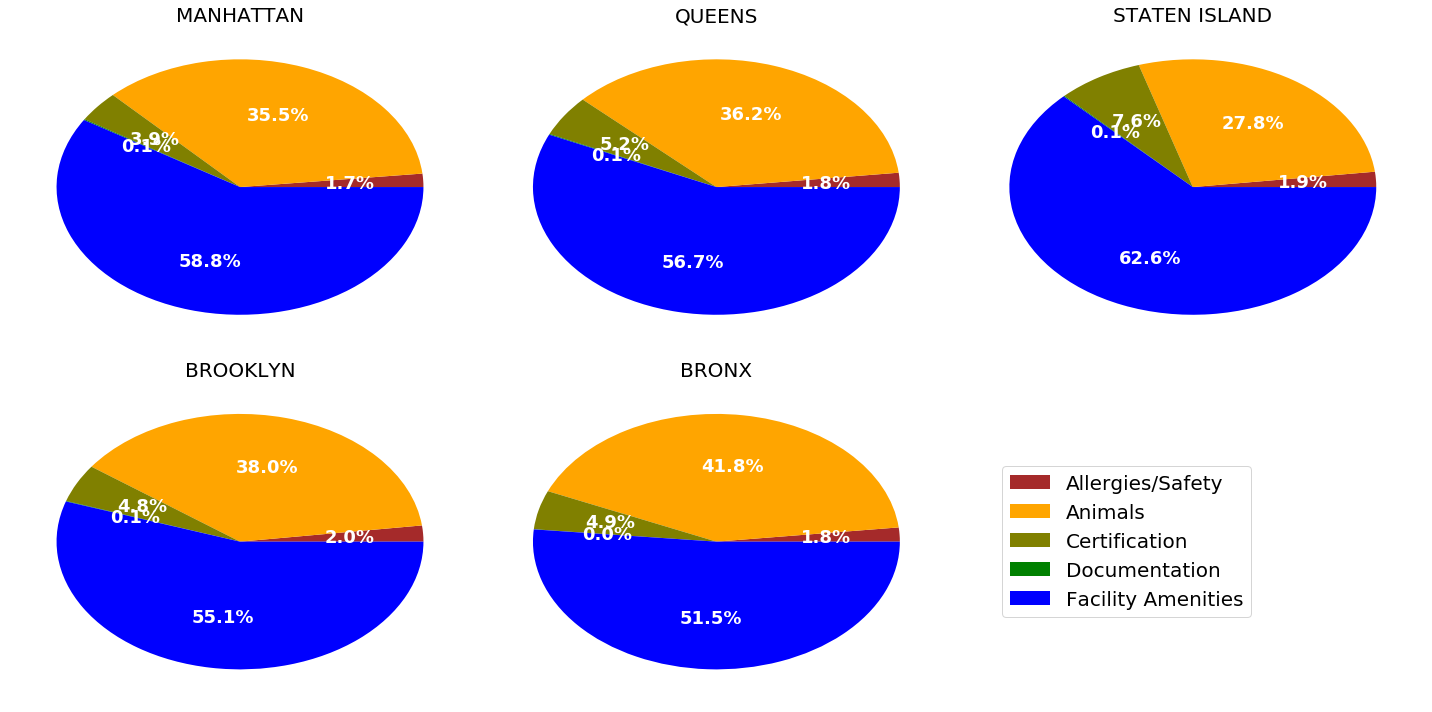

In [19]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

boros_list = df['BORO'].unique()
fig = plt.figure(figsize=(20,10))
graph = 1

for boro in boros_list:
    violations = df[df['BORO'] == boro].groupby(by='VIOLATION TYPE', sort=True)['BORO'].count().head(5)
    violations_pct = violations.values/violations.sum()
    ax = fig.add_subplot(2,3,graph)
    ax, text, autotext = plt.pie(violations, autopct=lambda pct: func(pct, violations), colors=colors[:len(violations)], textprops=dict(color="w"))
    plt.title(boro, fontsize=20)
    plt.setp(autotext, size=18, weight='bold')
    graph += 1
    plt.tight_layout()

labels = [l for l in violations.keys()]
plt.legend(ax, labels, bbox_to_anchor=(1.1,0.5), loc="center left", fontsize=20)
plt.show()

## Look at  the violations per type of cuisine

In [20]:
#df.head()

In [21]:
violation_cuisine = df.loc[:,['CUISINE DESCRIPTION', 'VIOLATION TYPE']].dropna()

In [22]:
import plotly.plotly as py

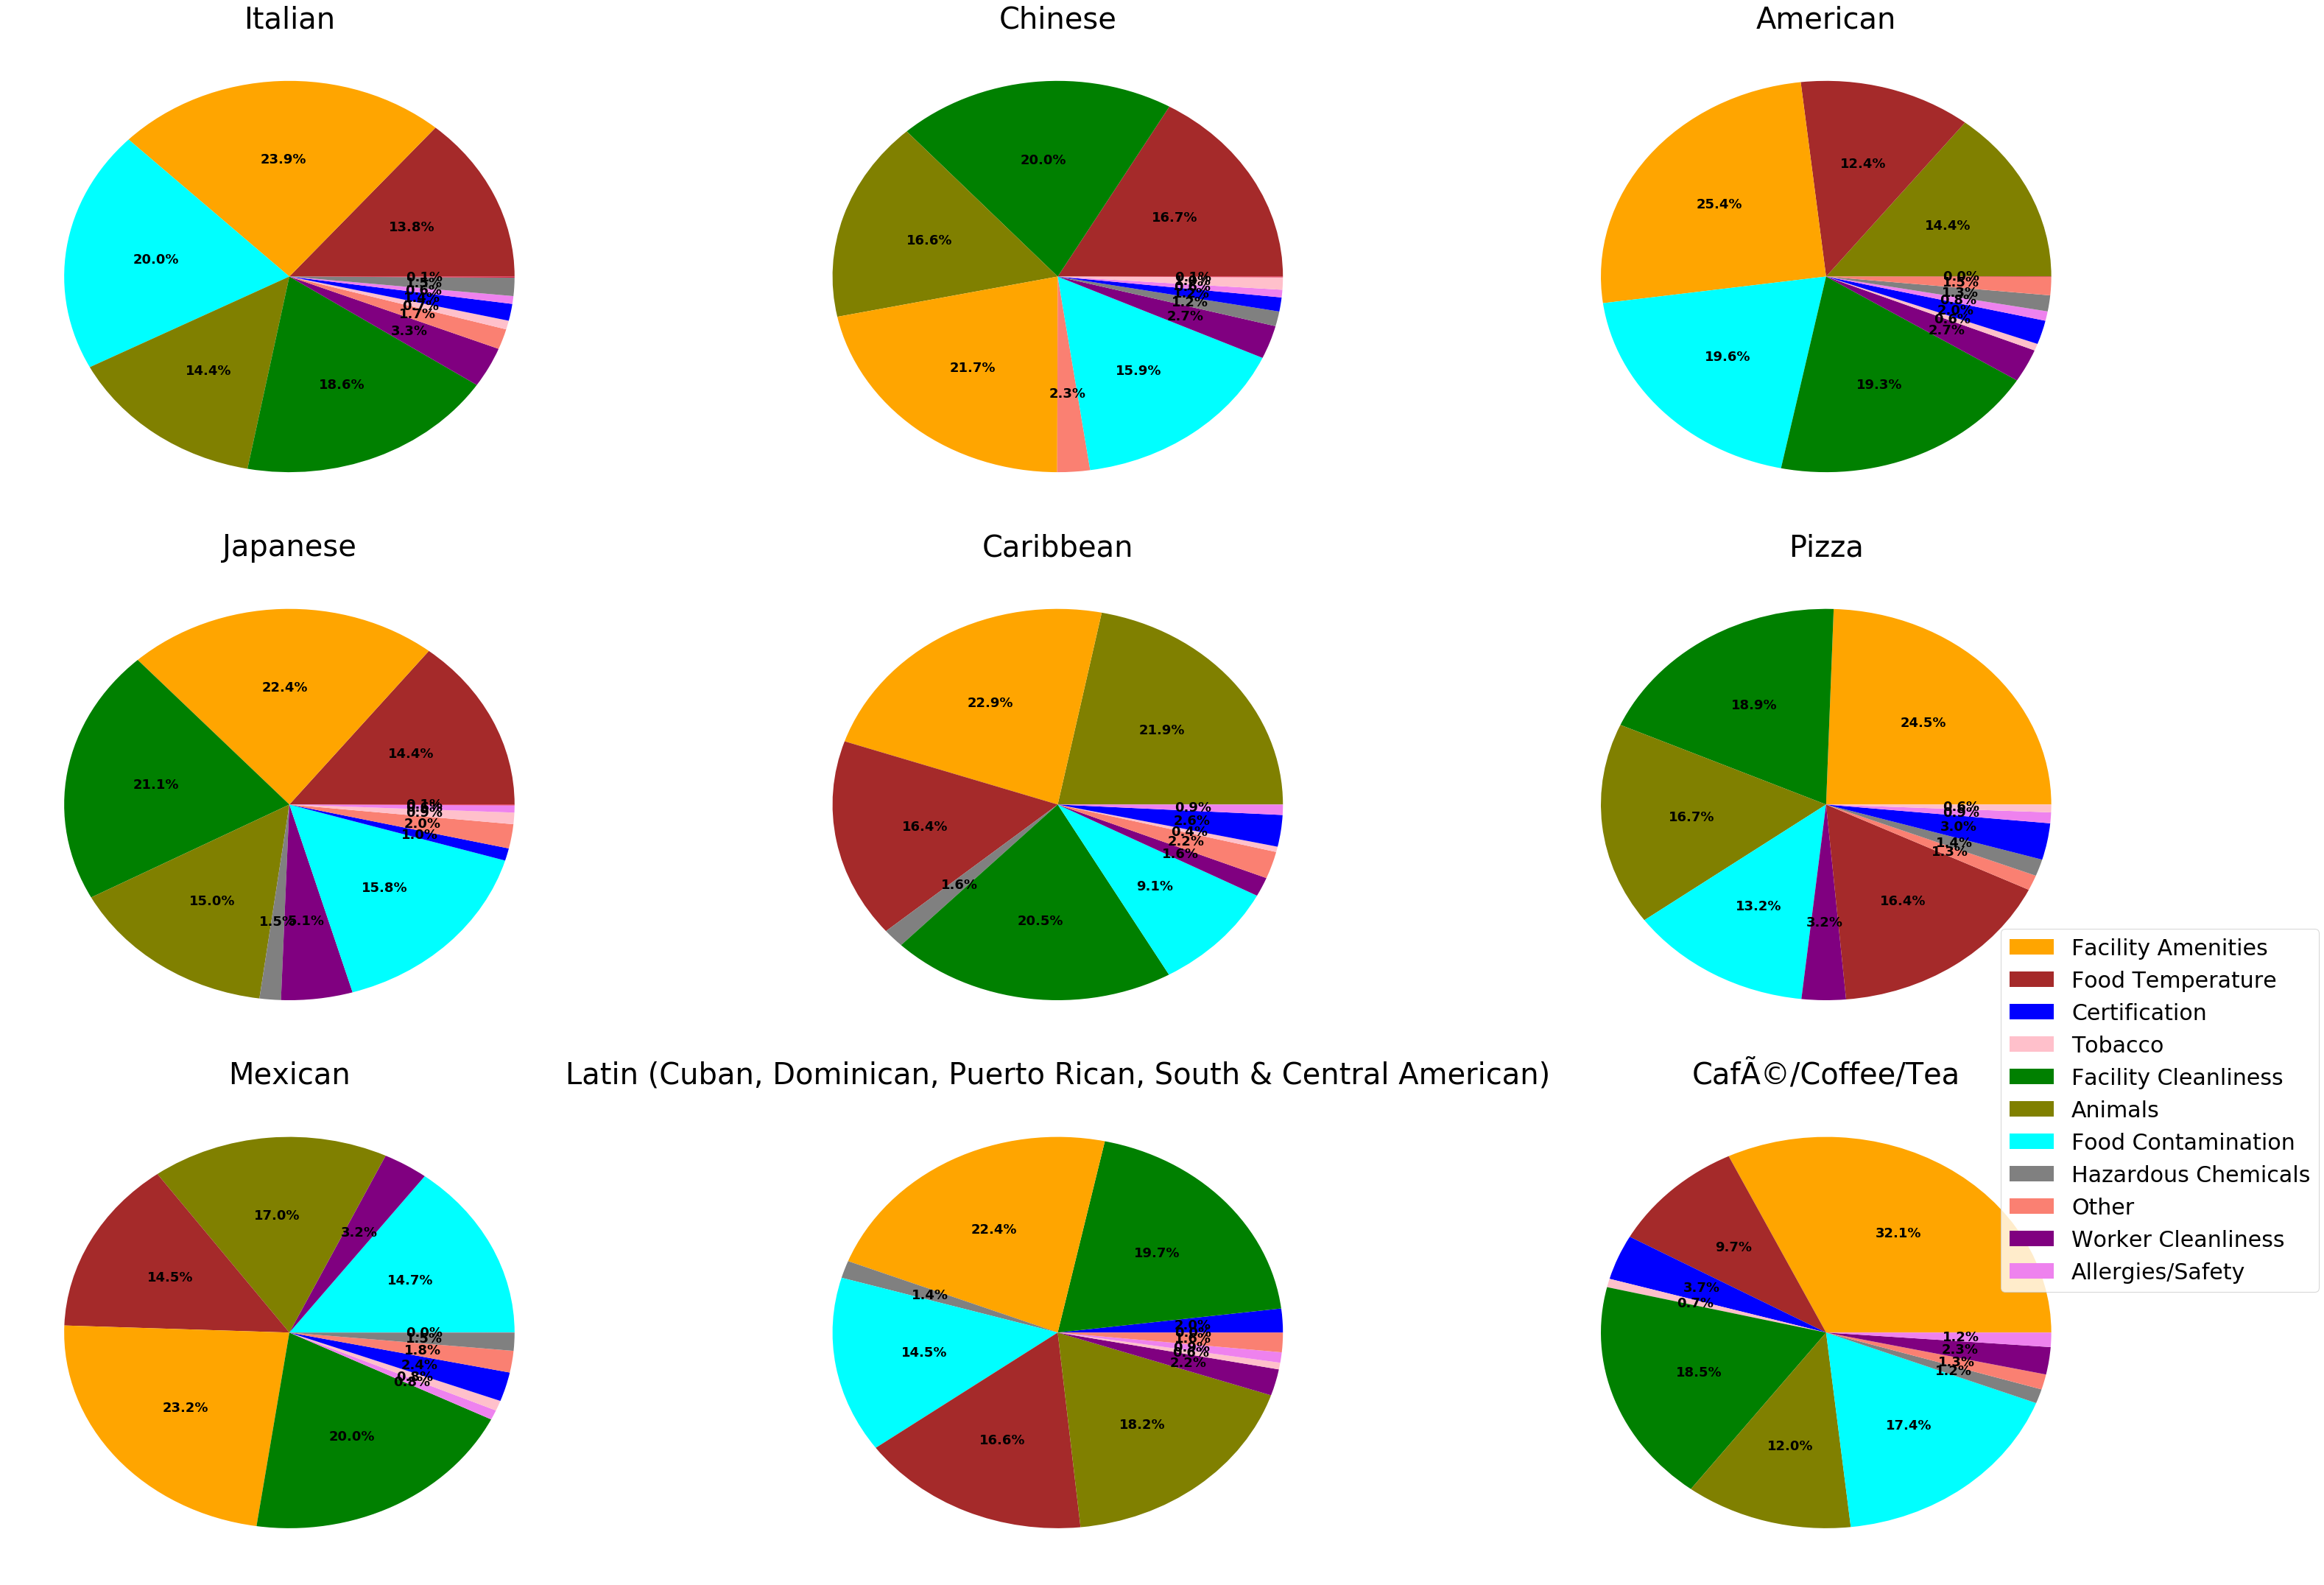

In [39]:
# violation_cuisine.head()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

fig = plt.figure(figsize=(40,30))
graph = 1


colors = ['brown', 'orange', 'olive', 'green', 'cyan', 'blue', 'purple', 'pink', 'gray', 'salmon', 'violet', 'crimson']
viol_color = {}

index = 0 
for i in violation_cuisine['VIOLATION TYPE'].unique():
    viol_color[i] = colors[index]
    index += 1

for i in violation_cuisine['CUISINE DESCRIPTION'].unique():
    viol = np.array([])
    labels = []
    types_cuis = violation_cuisine[violation_cuisine['CUISINE DESCRIPTION'] == i]
    for l in types_cuis['VIOLATION TYPE'].unique():
        if l != '':
            labels.append(l)
            viol= np.append(viol, len(types_cuis[types_cuis['VIOLATION TYPE'] == l]))
    ax = fig.add_subplot(3,3,graph)
    patches = plt.pie(viol, autopct=lambda pct: func(pct, viol), colors=[viol_color[c] for c in types_cuis['VIOLATION TYPE'].unique()])
    plt.title(i, fontsize=40)
    plt.setp(patches[2], size=18, weight='bold')
    graph += 1
    plt.tight_layout()
    
plt.legend(patches[0],labels, bbox_to_anchor=(1.1,0.3), loc="center right", fontsize=30, 
           bbox_transform=plt.gcf().transFigure)
plt.savefig('cuis_types.png', bbox_inches='tight')
plt.show()

### Do ML algorithms
The main objective is to determine whether a restauran will receive a critical flag or not.

### Decision Tree

In [24]:
#df.head()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

In [85]:
## Select the characteristics
dt = df.loc[:,[
#        'CUISINE DESCRIPTION', 
               'CRITICAL FLAG', 
#               'INSPECTION TYPE', 
#               'MONTH', 
               'VIOLATION TYPE'
]]
dt.loc[dt['CRITICAL FLAG'] == 'Not Applicable'] = np.nan

In [86]:
# Shuffle the rows to avoid orders
dt = dt.sample(frac=1).reset_index(drop=True)
dt = dt.dropna()
Y = dt['CRITICAL FLAG'].dropna()
X = dt.drop(dt.columns[0], axis=1)
#X = X.dropna()
Y = Y.astype(str)

In [87]:
from sklearn.preprocessing import LabelEncoder
for col in X.columns[:]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [89]:
estimator = tree.DecisionTreeClassifier(criterion="entropy")
estimator.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

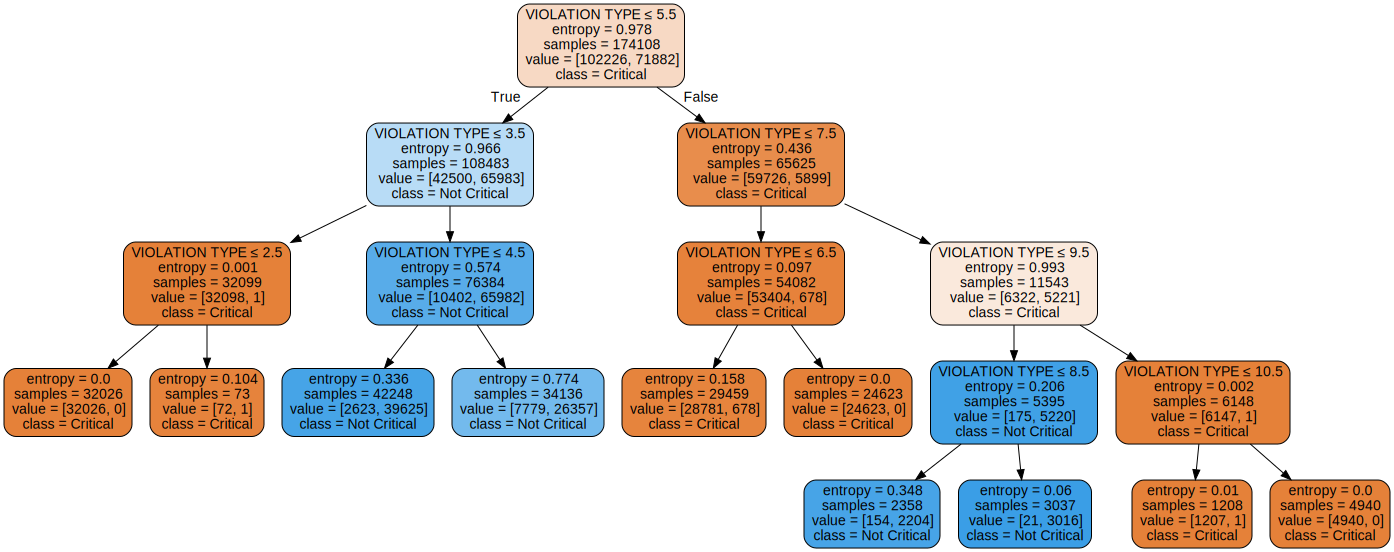

In [101]:
import graphviz 
dot_data = tree.export_graphviz(estimator, 
#                                out_file='tree.dot',
                                feature_names=X.keys(),
                                class_names=np.unique(Y),
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [102]:
Y_predicted_train = estimator.predict(X_train)
accuracy_train = np.mean(Y_train == Y_predicted_train)*100
print("The accuracy on training set is {0:.1f}%".format(accuracy_train))

The accuracy on training set is 93.6%


In [103]:
y_predicted_test = estimator.predict(X_test)
accuracy_test = np.mean(Y_test == y_predicted_test) * 100
print("The accuracy on test set is {0:.1f}%".format(accuracy_test))

The accuracy on test set is 93.5%


CRITICAL FLAG
VIOLATION TYPE


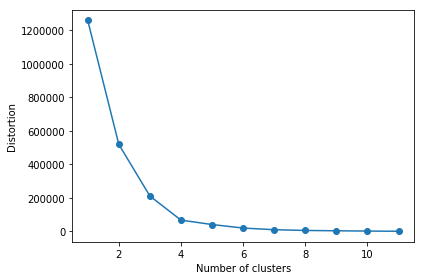

In [107]:
#Unsupervised method Kmeans to compute the optimal number of clusters with our data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
for col in dt.columns:
    print(col)

distortions = []
silhouette_avg = []
rnd_state = 42
for i in range(1,12):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=rnd_state)
    y_km = km.fit_predict(X)
    distortions.append(km.inertia_)
#    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
#    silhouette_avg = np.append(silhouette_avg, np.mean(silhouette_vals))

plt.plot(range(1,12), distortions , marker='o')


plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.59
[[34261     0]
 [23775     0]]


In [96]:
avg_scores = []
# all_scores = []
# parameter_values = [10**exp for exp in np.arange(-2.0,0.0, 0.25)]
#parameter_values = np.arange(0,1, 0.05)
parameter_values = np.arange(1,10)
for hp in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy"
#                                            , min_impurity_decrease = hp
                                            , max_depth = hp
                                           )
    estimator.fit(X_train, Y_train)
    Y_predicted = estimator.predict(X_test)
    score = np.mean(Y_test == Y_predicted) * 100 # compute the matches between prediction and true classes
#    avg_scores.append(np.mean(scores))
    avg_scores.append(score)
#    all_scores.append(scores)

In [97]:
#Supervised Method with Logistic Regression to predict Grade
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)